# 1. Global Earthquakes
In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. [10 points]
#参考section 06和section 09
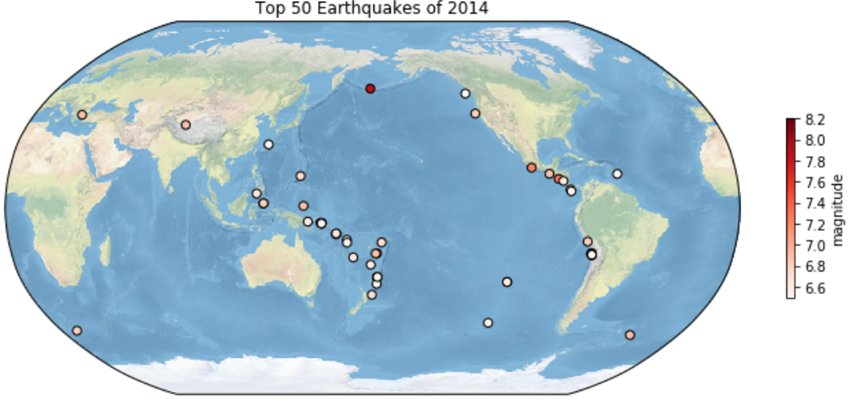

In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns


In [2]:
# Read a csv file
usgs = pd.read_csv("usgs_earthquakes.csv")
# Check information
#usgs.info()
usgs
#选择前50 mag 的地震
# Sort in descending order
top50_mag=usgs.sort_values("mag", ascending=False).head(50)
top50_mag


time  latitude  longitude   depth  mag magType  \
37371   2014-04-01 23:46:47.260  -19.6097   -70.7691   25.00  8.2     mww   
50562   2014-06-23 20:53:09.700   51.8486   178.7352  109.00  7.9     mww   
36918   2014-04-03 02:43:13.110  -20.5709   -70.4931   22.40  7.7     mww   
33808   2014-04-12 20:14:39.300  -11.2701   162.1481   22.56  7.6     mww   
31496   2014-04-19 13:28:00.810   -6.7547   155.0241   43.37  7.5     mww   
33537   2014-04-13 12:36:19.230  -11.4633   162.0511   39.00  7.4     mww   
95913   2014-10-14 03:51:34.460   12.5262   -88.1225   40.00  7.3     mww   
31850   2014-04-18 14:27:24.920   17.3970  -100.9723   24.00  7.2     mww   
34318   2014-04-11 07:07:23.130   -6.5858   155.0485   60.53  7.1     mww   
106285  2014-11-15 02:31:41.720    1.8929   126.5217   45.00  7.1     mww   
111052  2014-11-01 18:57:22.380  -19.6903  -177.7587  434.00  7.1     mww   
97602   2014-10-09 02:14:31.440  -32.1082  -110.8112   16.54  7.0     mww   
47934   2014-06-29 07:52:55.170  -55.4703   -28.3669    8.00  6.9     mww   
78063   2014-08-03 00:22:03.680    0.8295   146.1688   13.00  6.9     mww   
50609   2014-06-23 19:19:15.940  -29.9772  -177.7247   20.00  6.9     mww   
14025   2014-02-12 09:19:49.060   35.9053    82.5864   10.00  6.9     mww   
61294   2014-07-21 14:54:41.000  -19.8015  -178.4001  615.42  6.9     mww   
37367   2014-04-01 23:57:58.790  -19.8927   -70.9455   28.42  6.9     mww   
39915   2014-05-24 09:25:02.440   40.2893    25.3889    6.43  6.9     mww   
66278   2014-07-07 11:23:54.780   14.7240   -92.4614   53.00  6.9     mww   
24887   2014-03-10 05:18:13.400   40.8287  -125.1338   16.60  6.8      Mw   
32964   2014-04-15 03:57:01.370  -53.4967     8.7220   11.18  6.8     mww   
101767  2014-11-26 14:33:43.640    1.9604   126.5751   39.00  6.8     mww   
71135   2014-08-24 23:21:45.520  -14.5980   -73.5714  101.00  6.8     mww   
22968   2014-03-16 21:16:29.600  -19.9807   -70.7022   20.00  6.7     mww   
84421   2014-09-17 06:14:45.410   13.7641   144.4294  130.00  6.7     mww   
105466  2014-11-16 22:33:20.450  -37.6478   179.6621   22.00  6.7     mww   
50587   2014-06-23 20:06:20.710  -29.9414  -177.6073   26.59  6.7     mwc   
47776   2014-06-29 17:15:09.340  -14.9831  -175.5096   18.00  6.7     mww   
46333   2014-05-04 09:15:52.880  -24.6108   179.0856  527.00  6.6     mww   
33523   2014-04-13 13:24:59.710  -11.1284   162.0520   10.00  6.6     mww   
117886  2014-12-08 08:54:52.520    7.9401   -82.6865   20.00  6.6     mww   
47320   2014-05-01 06:36:35.550  -21.4542   170.3546  106.00  6.6     mww   
119708  2014-12-02 05:11:31.000    6.1572   123.1261  614.00  6.6     mww   
97597   2014-10-09 02:32:05.140  -32.0953  -110.8647   10.00  6.6     mww   
109305  2014-11-07 03:33:55.280   -5.9873   148.2315   53.19  6.6     mww   
118288  2014-12-07 01:22:02.180   -6.5108   154.4603   23.00  6.6     mww   
34096   2014-04-11 20:29:12.970   11.6420   -85.8779  135.00  6.6     mww   
31670   2014-04-19 01:04:03.820   -6.6558   155.0869   29.00  6.6     mww   
15979   2014-02-07 08:40:13.550  -15.0691   167.3721  122.00  6.5     mww   
103919  2014-11-21 10:10:19.630    2.2999   127.0562   35.00  6.5     mww   
17606   2014-02-02 09:26:37.820  -32.9076  -177.8806   44.26  6.5     mww   
26972   2014-03-02 20:11:23.430   27.4312   127.3674  119.00  6.5     mww   
36929   2014-04-03 01:58:30.530  -20.3113   -70.5756   24.07  6.5     mww   
34302   2014-04-11 08:16:45.660   -6.7878   154.9502   20.00  6.5     mww   
50608   2014-06-23 19:21:45.990  -29.9379  -177.5159   10.00  6.5     mwc   
64647   2014-07-11 19:22:00.820   37.0052   142.4525   20.00  6.5     mww   
12142   2014-02-18 09:27:13.120   14.6682   -58.9272   14.83  6.5     mww   
29890   2014-04-24 03:10:10.150   49.6388  -127.7316   10.00  6.5     mww   
67518   2014-07-04 15:00:27.860   -6.2304   152.8075   20.00  6.5     mww   

        nst    gap      dmin   rms net          id                   updated  \
37371   NaN   23.0 

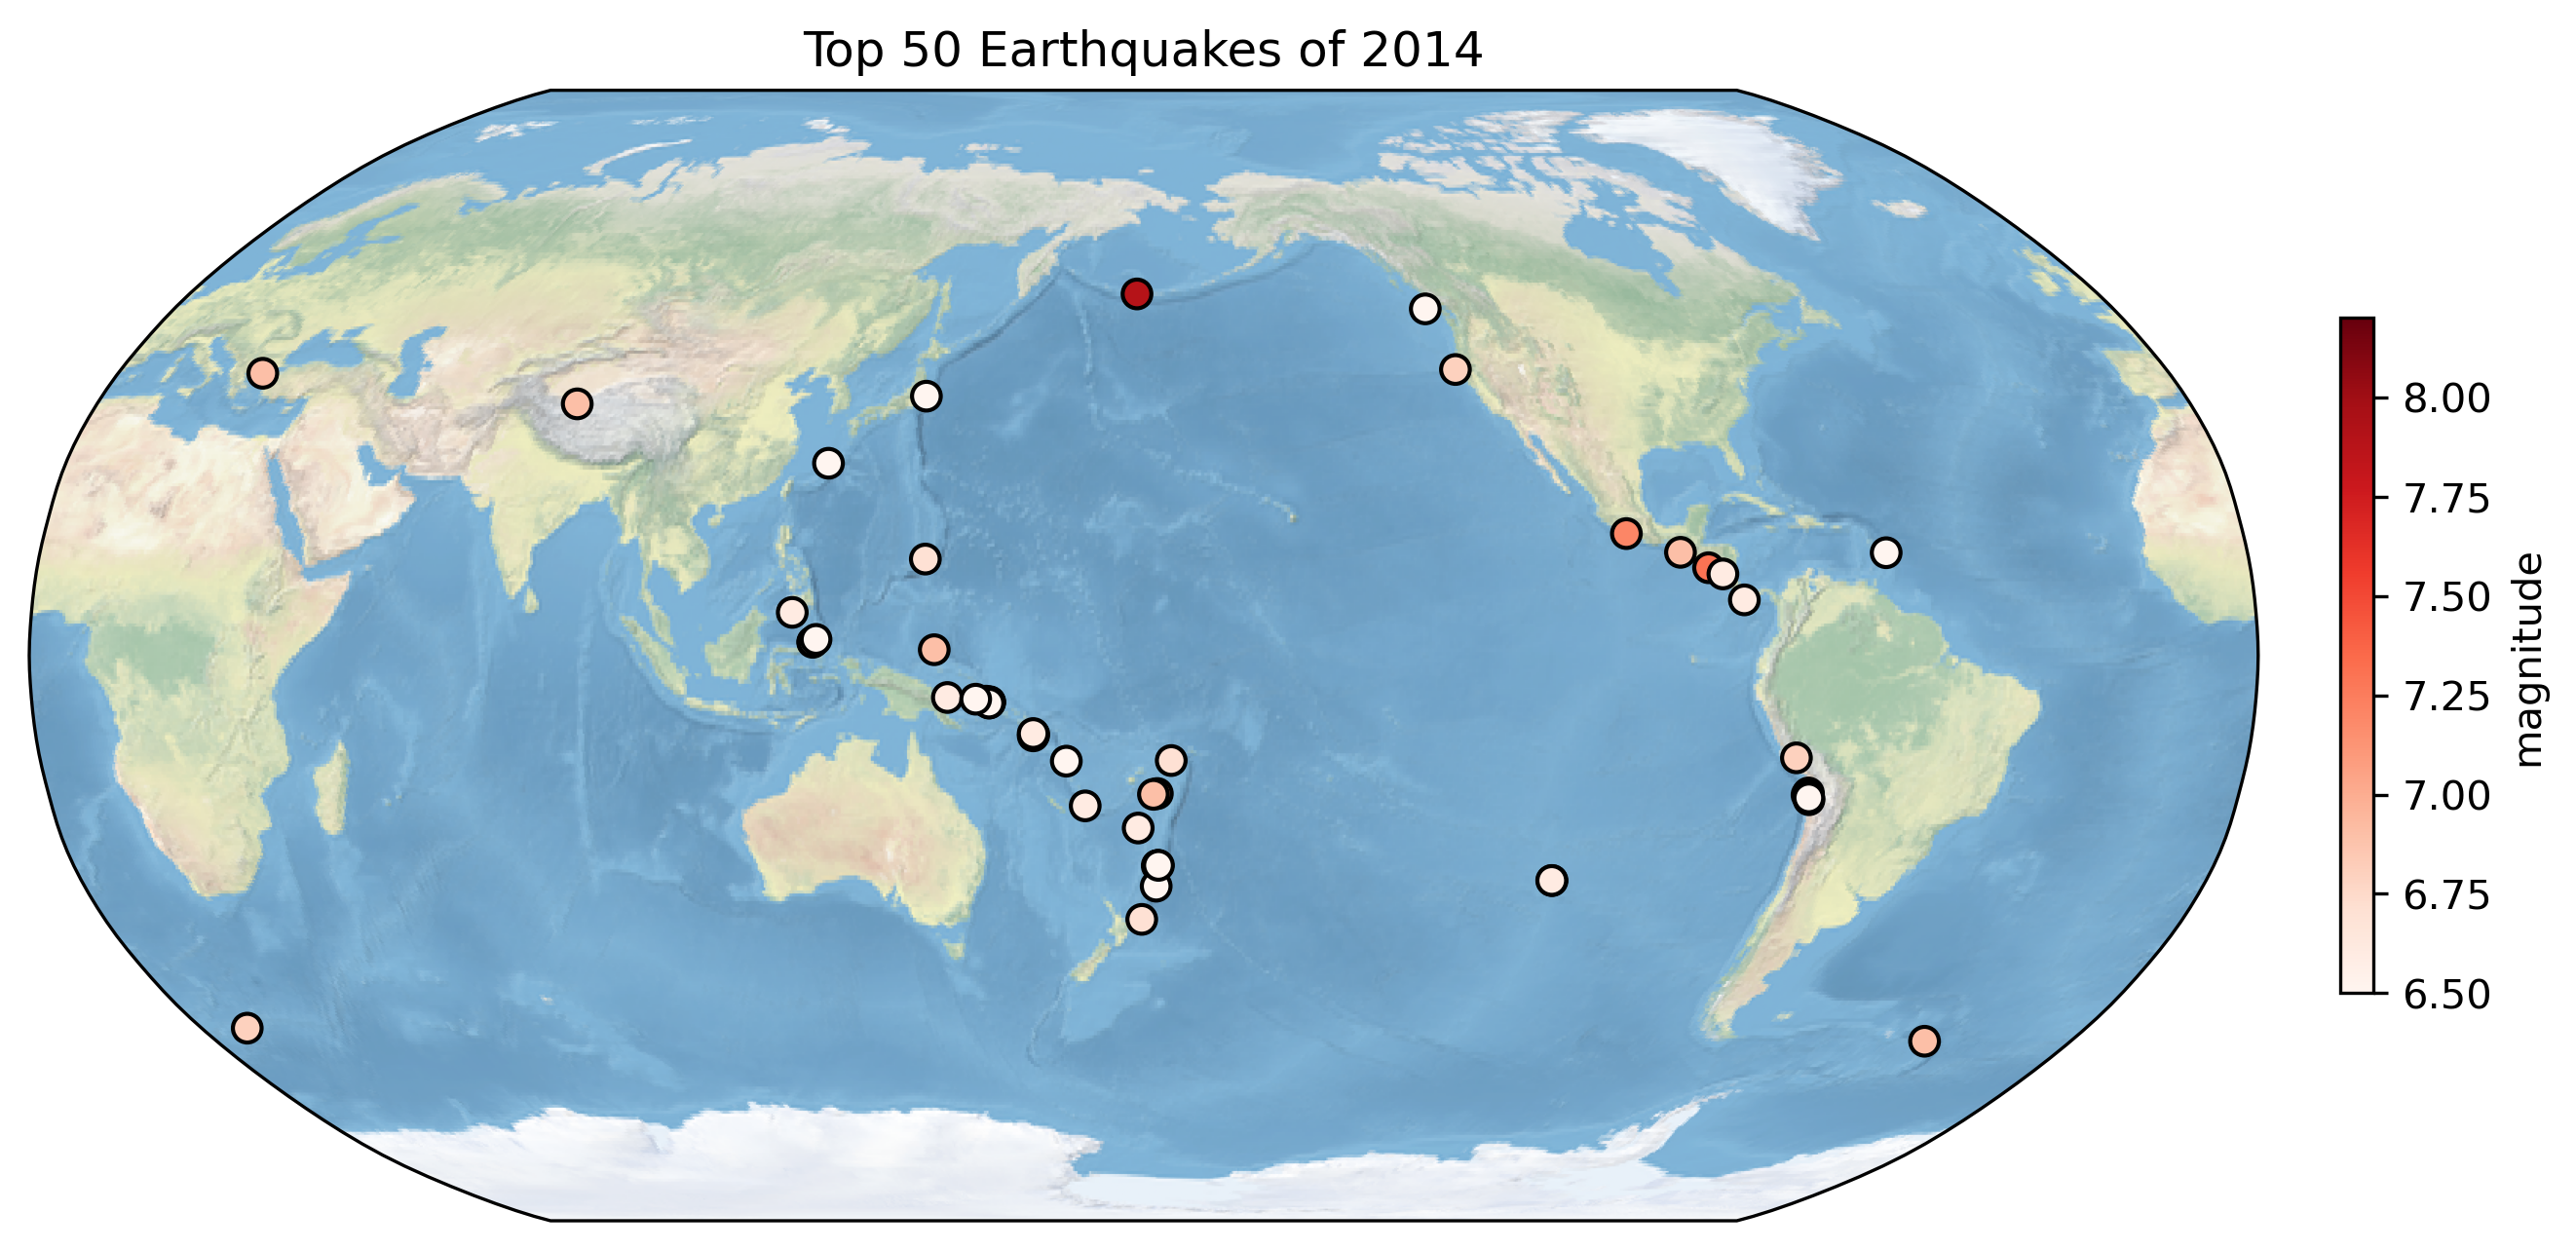

In [13]:
###画图
plt.figure(figsize=(12,10), dpi=300)
# 创建投影
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180)) 
# 设置地图范围
ax.stock_img()
# Add title
ax.set_title('Top 50 Earthquakes of 2014')
# # # 获取前50的数据
lons = top50_mag['longitude'] #经度
lats = top50_mag['latitude']
values = top50_mag['mag']  

# 绘制散点，根据值确定颜色
sc = ax.scatter(lons,lats,c=values, s=50,cmap='Reds',edgecolors='k',transform=ccrs.PlateCarree())#  transform=ccrs.PlateCarree()
# 添加颜色图例
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.3, pad=0.03)
cbar.set_label('magnitude')
# 显示地图
plt.show()

# 2. Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).


In [15]:
#读取数据
# Load the netCDF4 file
hgt_data= xr.open_dataset("hgt.2017z.nc", engine="netcdf4")
# Check the data
hgt_data

<xarray.Dataset>
Dimensions:    (level: 17, lat: 73, lon: 144, time: 349, nbnds: 2)
Coordinates:
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-15
Dimensions without coordinates: nbnds
Data variables:
    hgt        (time, level, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [70]:
#选择5月,500hPa位势高度场
hgt500Data=hgt_data['hgt']
# 选择5月份的数据
hgt_may = hgt500Data.sel(time=hgt500Data['time.month']== 5)
hgt_box = hgt_may.isel(level=5).mean(dim=['time'])  #2017 年500hPa hgt 5月平均场 
hgt_box_max=np.max(hgt_box) #找最大值
hgt_box_min=np.min(hgt_box) #找最小值
hgt_box['lat']



<xarray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:          degrees_north
    actual_range:   [ 90. -90.]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

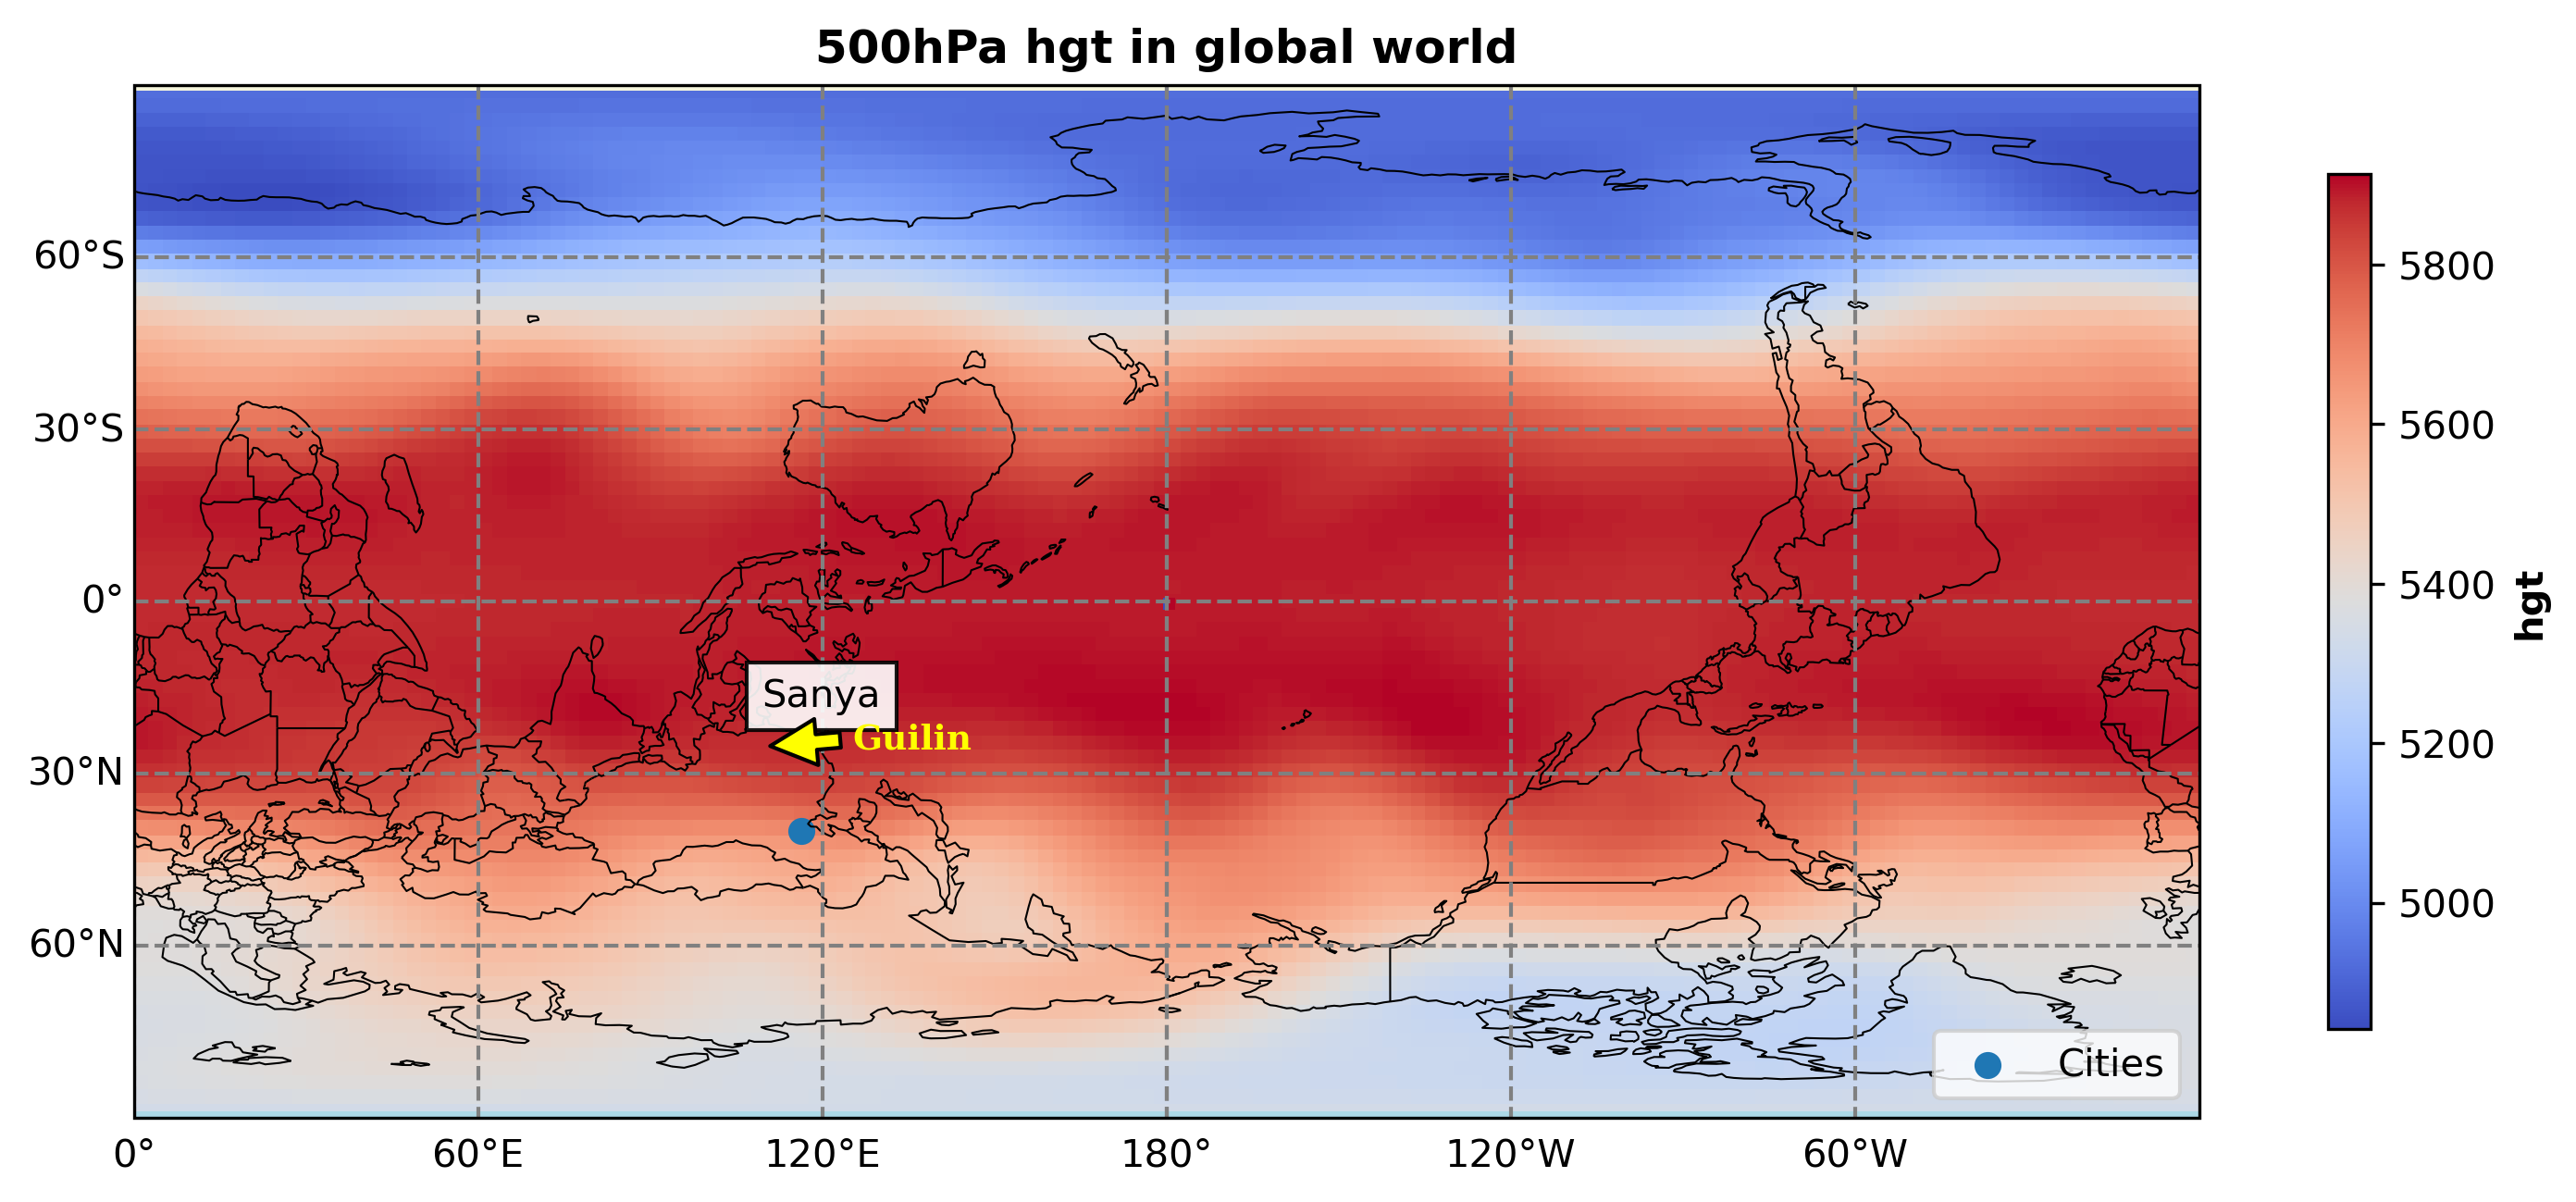

In [69]:
# 设置图框
plt.figure(figsize=(12,10), dpi=300)
# 创建投影
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) 

#  画500hgt位势高度场
plt.imshow(hgt_box, cmap='coolwarm', interpolation='nearest',aspect='auto',transform=ccrs.PlateCarree()) #

# # 添加颜色条
cbar = plt.colorbar(ax.imshow([[hgt_box_min,hgt_box_max],[hgt_box_min,hgt_box_max]], cmap='coolwarm'), ax=ax, shrink=0.4)
cbar.ax.set_ylabel('hgt', fontweight='bold')

# # 添加网格线
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', linestyle='--')
gl.top_labels = False
gl.right_labels = False

# # 添加地图特征
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAND, facecolor='beige')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')

# # 设置坐标轴标签和标题
ax.set_xlabel('Longitude', fontweight='bold')
ax.set_ylabel('Latitude', fontweight='bold')
ax.set_title('500hPa hgt in global world', fontweight='bold')

# 添加图例
ax.scatter(116.41,39.91, transform=ccrs.PlateCarree(), label='Cities')
ax.legend(loc='lower right')

# 添加文本框和注释
ax.text(109.52-180,18.26, 'Sanya', bbox=dict(facecolor='white', alpha=0.9))  #在这个位置添加文本框
ax.annotate('Guilin', xy=(110.18-180, 25.24), xytext=(125.25-180, 25.54),     #注释某点
            arrowprops=dict(facecolor='yellow',shrink=0.05),fontsize=9, fontweight='bold', fontfamily='serif', color='yellow')


plt.show()

2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

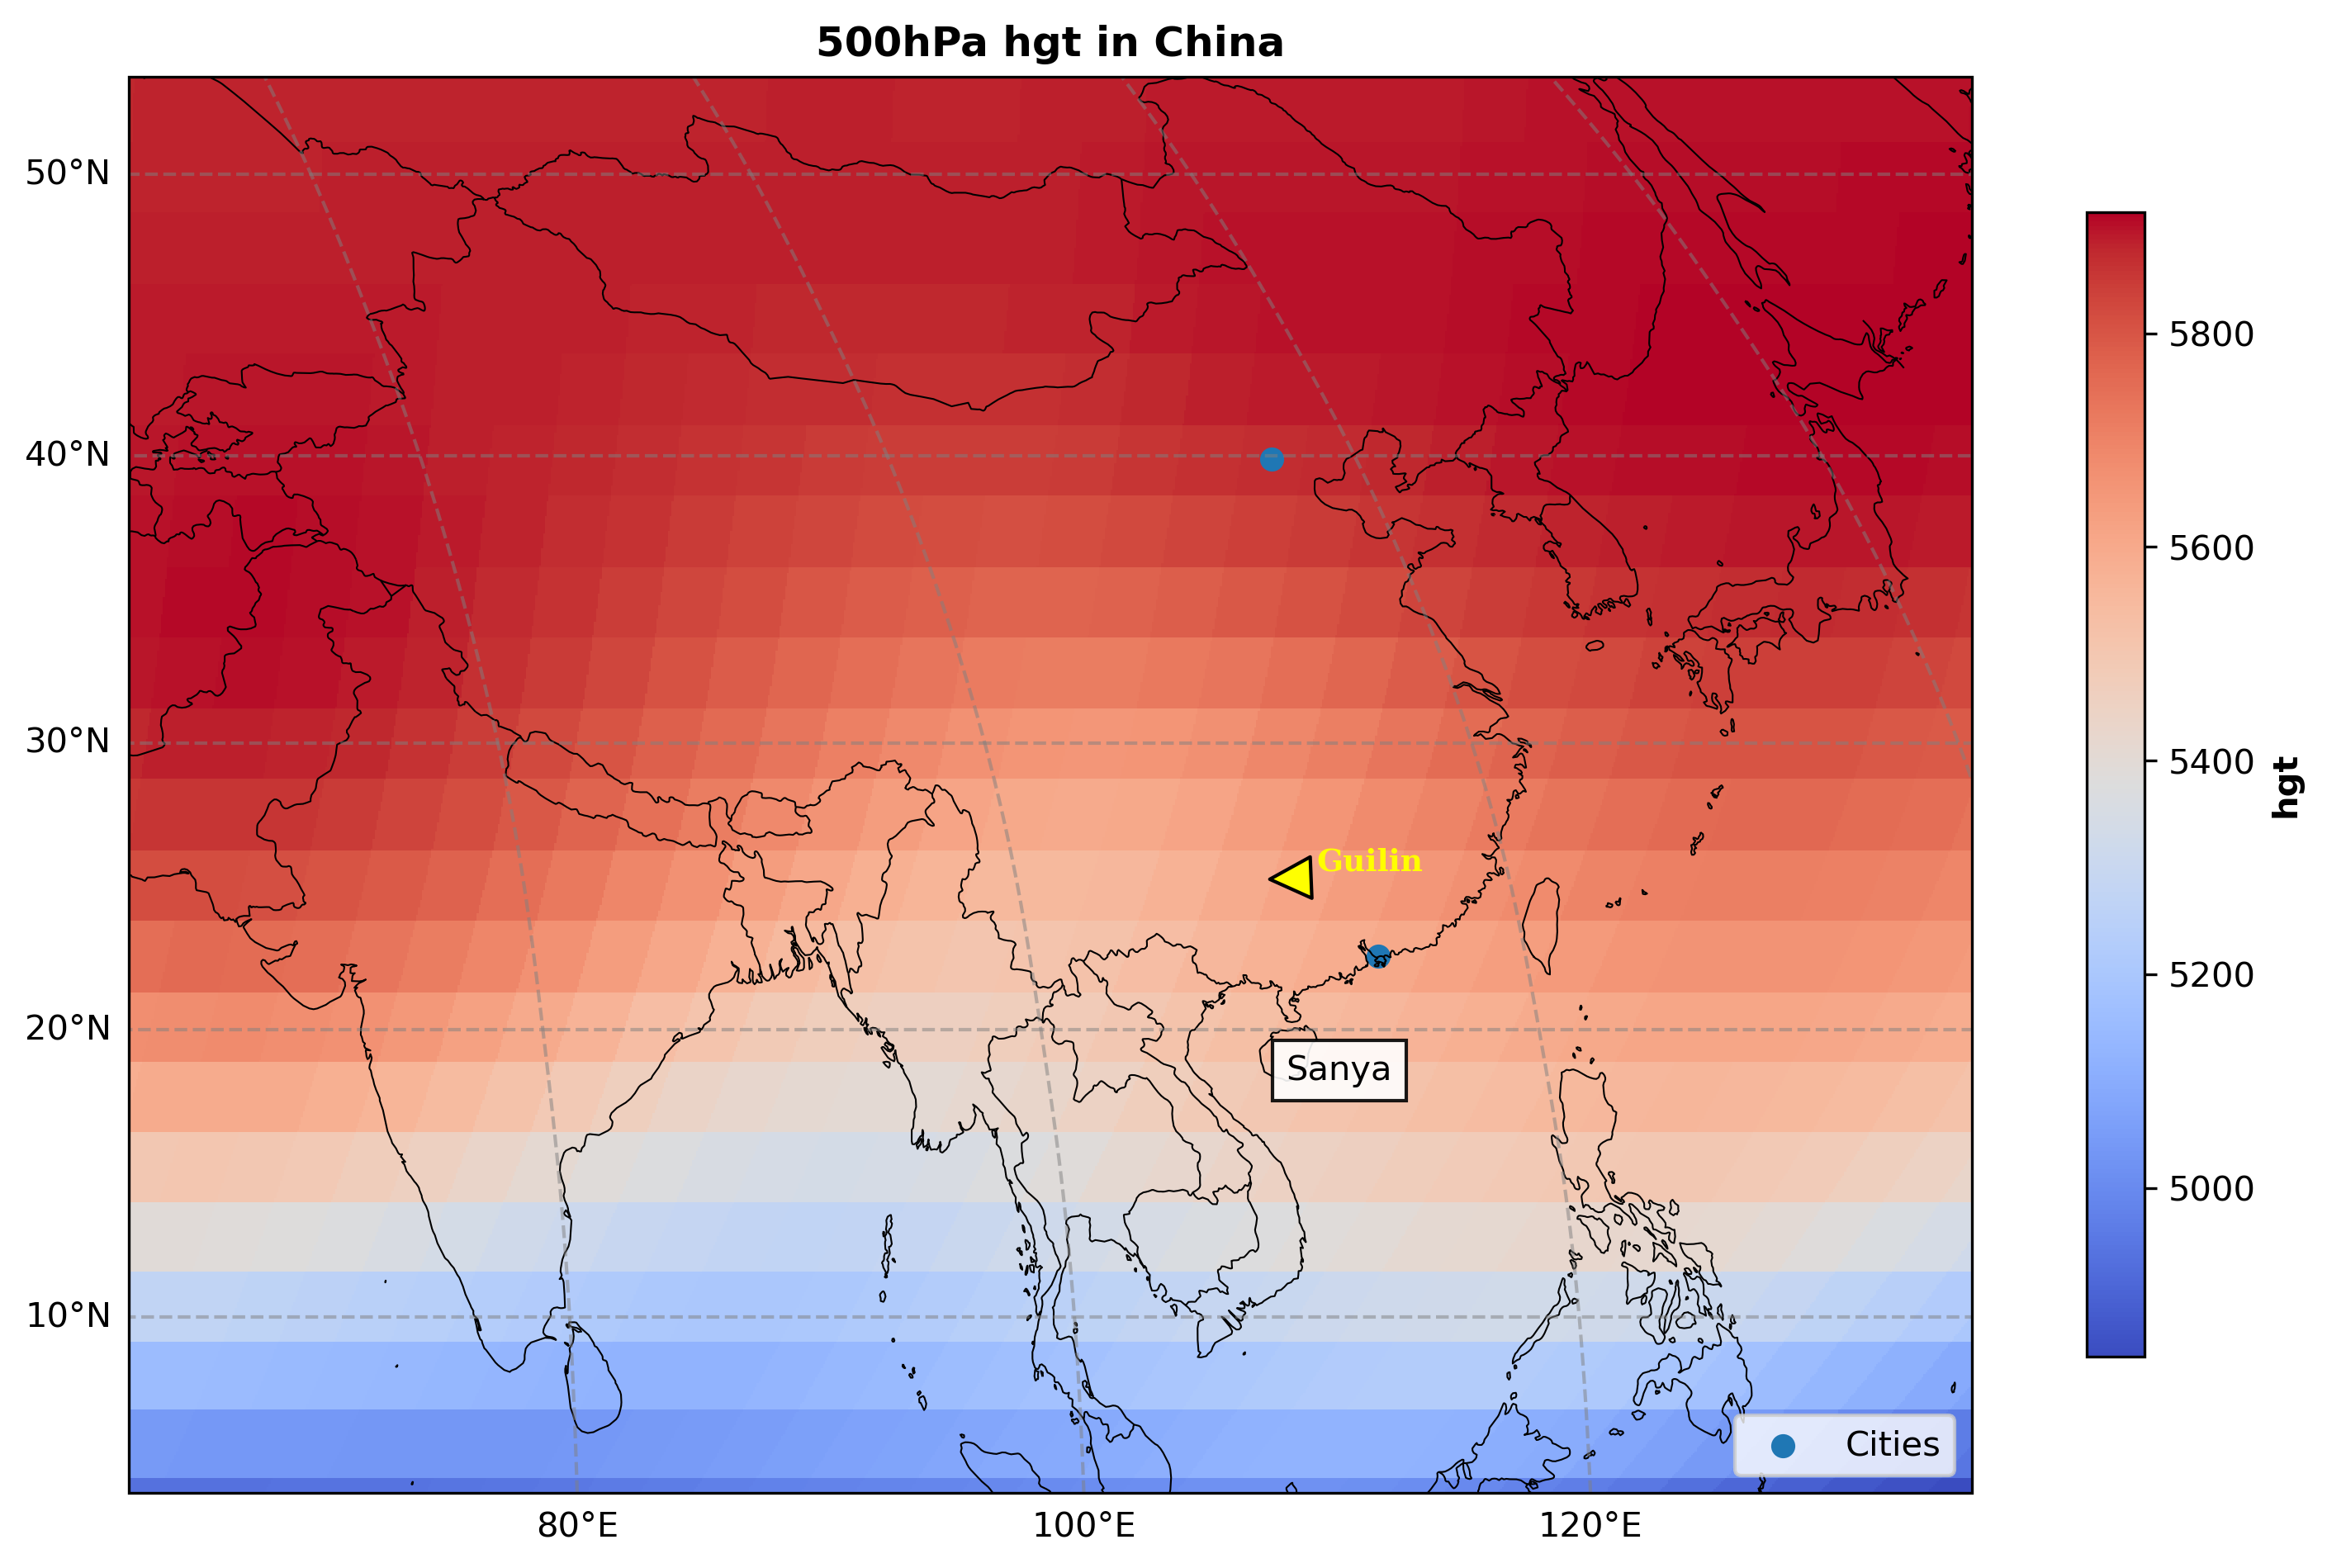

In [67]:
# 创建一个地图对象
plt.figure(figsize=(12,10), dpi=300)
# 创建投影
ax = plt.axes(projection=ccrs.Robinson()) 
# 设置中国范围
ax.set_extent([73.66, 135.05, 3.86, 53.55], crs=ccrs.PlateCarree())
#  画500hgt位势高度场
plt.imshow(hgt_box, cmap='coolwarm', interpolation='nearest', aspect='auto',transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(ax.imshow([[hgt_box_min,hgt_box_max],[hgt_box_min,hgt_box_max]], cmap='coolwarm'), ax=ax, shrink=0.6)
cbar.ax.set_ylabel('hgt', fontweight='bold')
# 添加地图特征
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAND, facecolor='beige')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
# 设置坐标轴标签和标题
ax.set_xlabel('Longitude', fontweight='bold')
ax.set_ylabel('Latitude', fontweight='bold')
ax.set_title('500hPa hgt in China', fontweight='bold')
# 添加网格线
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--') 
gl.top_labels = False
gl.right_labels = False
# 添加一些数据
x = [114.06, 116.41]
y = [22.55, 39.91]
labels = ['Shenzhen', 'Beijin']
# 添加图例
ax.scatter(x, y, transform=ccrs.PlateCarree(), label='Cities')
ax.legend(loc='lower right')
# 添加文本框和注释
ax.text(109.52,18.26 , 'Sanya', bbox=dict(facecolor='white', alpha=0.9),transform=ccrs.PlateCarree())  #在这个位置添加文本框
ax.annotate('Guilin', xy=(110.18, 25.24), xytext=(112.25, 25.54),     #注释某点
            arrowprops=dict(facecolor='yellow',shrink=0.05),fontsize=9, fontweight='bold', fontfamily='serif', color='yellow',transform=ccrs.PlateCarree())
plt.show()